In [1]:
"Last edited Wed Jan 11"

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import dask 
import pandas as pd
import xrft 
from scipy.interpolate import griddata

from scipy.ndimage import gaussian_filter as gauss


from pyspec import spectrum as spec
from matplotlib.colors import LogNorm

In [2]:
xmon=1

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'z_SASI_6h_his_2012*.nc');listt.sort()
vart=xr.open_dataset(listt[xmon],decode_times=False)
# vart=xr.open_mfdataset(listt)


path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'z_SASI_6h_his_2012*.nc');listm.sort()
varf=xr.open_dataset(listm[xmon],decode_times=False)
# varf=xr.open_mfdataset(listm)



/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'u' has multiple fill values {1e+33, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'v' has multiple fill values {1e+33, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'w' has multiple fill values {1e+33, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'temp' has multiple fill values {1e+33, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/homes/metogra/iufarias/miniconda

In [3]:
varf

<xarray.Dataset>
Dimensions:       (depth: 20, time: 116, eta_rho: 1520, eta_u: 999, eta_v: 1519, xi_rho: 1000)
Coordinates:
  * depth         (depth) float32 -1.0 -5.0 -10.0 -15.0 ... -85.0 -90.0 -95.0
Dimensions without coordinates: time, eta_rho, eta_u, eta_v, xi_rho
Data variables:
    time_counter  (time) float32 ...
    u             (time, depth, eta_rho, eta_u) float32 ...
    v             (time, depth, eta_v, xi_rho) float32 ...
    w             (time, depth, eta_rho, xi_rho) float32 ...
    temp          (time, depth, eta_rho, xi_rho) float32 ...
    salt          (time, depth, eta_rho, xi_rho) float32 ...
    rho           (time, depth, eta_rho, xi_rho) float32 ...

In [3]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [4]:
vart.temp.shape

(116, 20, 1520, 1000)

In [27]:
aat=vart.temp[:,:,:,500] -vart.temp[:,0,:,500]
aaf=varf.temp[:,:,:,500] -varf.temp[:,0,:,500]

In [28]:
ddt=np.zeros(vart.temp[:,0,:,500].shape)*np.nan;ddt.shape
ddf=np.zeros(varf.temp[:,0,:,500].shape)*np.nan;ddf.shape

(116, 1520)

In [30]:
for ixx in range(aat.shape[0]):
    for ixy in range(aat.shape[2]):
            ddf[ixx,ixy]=varf.depth[np.abs(aaf[ixx,:,ixy])<=0.2].min()
            ddt[ixx,ixy]=vart.depth[np.abs(aat[ixx,:,ixy])<=0.2].min()


In [31]:
varf.temp.shape

(116, 20, 1520, 1000)

In [73]:
tt=np.arange(np.datetime64('2012-02-01'),np.datetime64('2012-03-01'),np.timedelta64(6,'h'))
tt=pd.DatetimeIndex(tt)
yy=vart.eta_rho

In [71]:
tt.strftime('%d')

Index(['01', '01', '01', '01', '02', '02', '02', '02', '03', '03',
       ...
       '27', '27', '28', '28', '28', '28', '29', '29', '29', '29'],
      dtype='object', length=116)

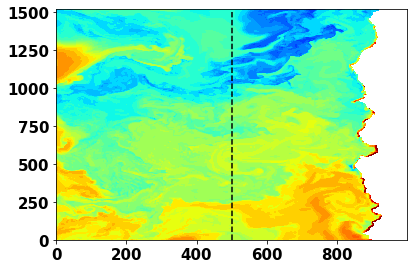

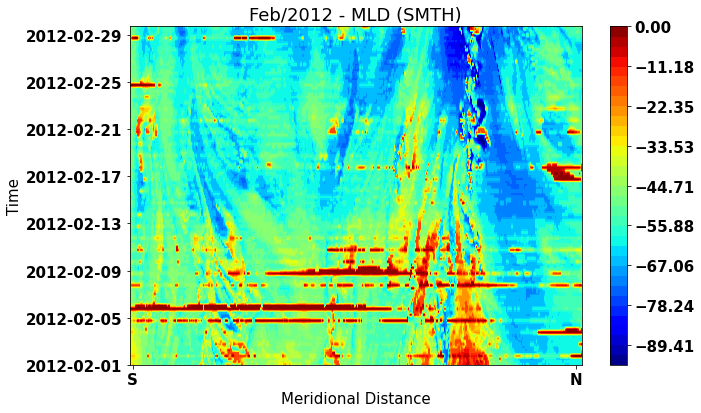

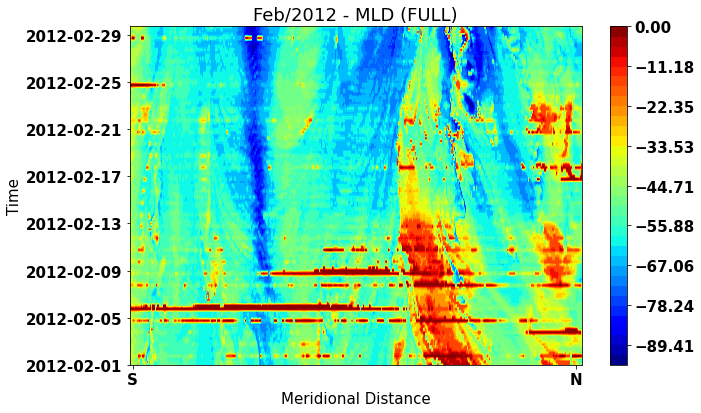

In [118]:
plt.figure()
plt.contourf(vart.temp[0,0,:,:],cmap='jet',levels=np.linspace(9,14,35))
plt.plot([500,500],[0,1500],'k--')

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures_mld/map_sec.png')

plt.figure(figsize=(10,6))
plt.contourf(yy,tt,ddt,cmap='jet',levels=np.linspace(-95,0,35))
plt.xlabel('Meridional Distance')
plt.ylabel('Time')
plt.title('Feb/2012 - MLD (SMTH)')
plt.xticks([10,1500],['S', 'N'])
plt.yticks()
plt.colorbar()
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures_mld/mean_mld_SMTH.png')



plt.figure(figsize=(10,6))
plt.contourf(yy,tt,ddf,cmap='jet',levels=np.linspace(-95,0,35))
plt.xlabel('Meridional Distance')
plt.ylabel('Time')
plt.title('Feb/2012 - MLD (FULL)')
plt.xticks([10,1500],['S', 'N'])
plt.colorbar()

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures_mld/mean_mld_FULL.png')



In [41]:
t_p1=vart.temp[:,:,750,500] -vart.temp[:,0,750,500]
f_p1=varf.temp[:,:,750,500] -varf.temp[:,0,750,500]

t_p2=vart.temp[:,:,250,800] -vart.temp[:,0,250,800]
f_p2=varf.temp[:,:,250,800] -varf.temp[:,0,250,800]

dt1=np.zeros(t_p1.shape[0])*np.nan;
df1=np.zeros(f_p1.shape[0])*np.nan;
dt2=np.zeros(t_p2.shape[0])*np.nan;
df2=np.zeros(f_p2.shape[0])*np.nan;

In [42]:
for ixx in range(aat.shape[0]):
    df1[ixx]=varf.depth[np.abs(f_p1[ixx,:])<=0.2].min()
    dt1[ixx]=vart.depth[np.abs(t_p1[ixx,:])<=0.2].min()

    df2[ixx]=varf.depth[np.abs(f_p2[ixx,:])<=0.2].min()
    dt2[ixx]=vart.depth[np.abs(t_p2[ixx,:])<=0.2].min()


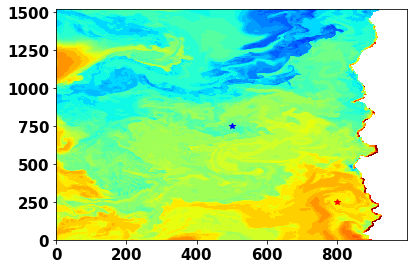

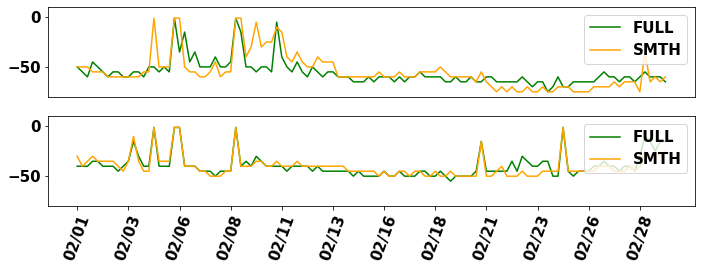

In [125]:
plt.figure()
plt.contourf(vart.temp[0,0,:,:],cmap='jet',levels=np.linspace(9,14,35))
plt.plot(500,750,'b*')
plt.plot(800,250,'r*')
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures_mld/map_points_mld.png')


plt.figure(figsize=(10,4))

plt.subplot(2,1,1)
plt.plot(tt,df1,'green',label='FULL')
plt.plot(tt,dt1,'orange',label='SMTH')
plt.xticks([])
plt.ylim(-80,10)
plt.legend(loc=1)

plt.subplot(2,1,2)
plt.plot(tt,df2,'green',label='FULL')
plt.plot(tt,dt2,'orange',label='SMTH')
plt.xticks(tt[::10],tt[::10].strftime('%m/%d'),rotation=70)
plt.ylim(-80,10)
plt.legend(loc=1)
plt.tight_layout()


plt.savefig('/homes/metogra/iufarias/Documents/Scripts/figures_mld/points_mld.png')

